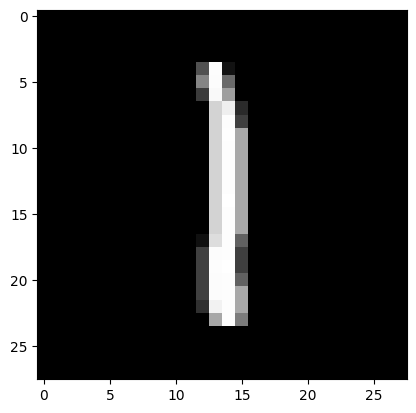

Longueur de X_train : 29400
Longueur de X_test : 12600
Longueur de y_train : 29400
Longueur de y_test : 12600
Accuracy: 0.9655555555555555


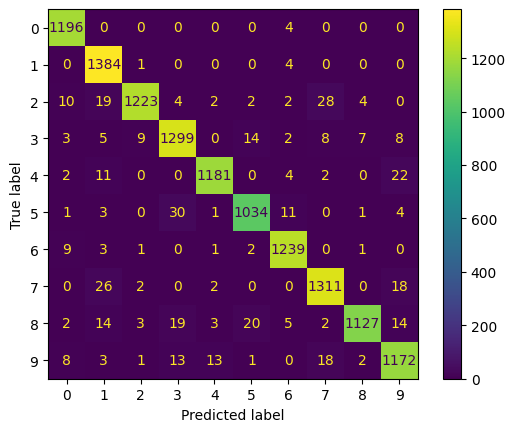

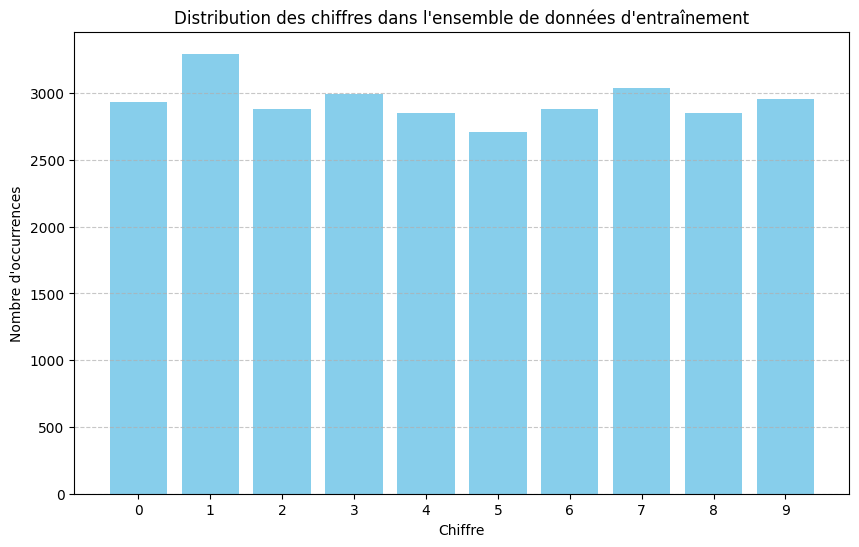

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import sys 
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Charger les fichiers CSV de données téléchargés depuis Kaggle
train_data = pd.read_csv(r'C:\Users\fiche\Downloads\train.csv')
# affiche le csv 

# Assurez-vous que le chemin d'accès est correct et que le fichier CSV est dans le même répertoire que votre notebook.
df = pd.read_csv(r'C:\Users\fiche\Downloads\train.csv')

# Supposons que chaque image est de taille 28x28 pixels et que chaque ligne du CSV représente une image.
image_size = (28, 28) # Changez ceci selon la taille réelle des images dans votre dataset.

# Convertissons les données en un tableau numpy pour un traitement plus facile
# On exclut la première colonne si c'est une étiquette.
data = df.iloc[:, 1:].to_numpy()
# Affichons la première image comme exemple
first_image = data[1000].reshape(image_size)
plt.imshow(first_image, cmap='gray') # Utilisez cmap='gray' si les images sont en niveaux de gris
plt.show()

# affiche une image de chiffre du csv 
# Prétraitement des données : Normalisation (pas nécessaire pour k-NN, mais peut être utile dans d'autres cas)
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data, df['label'], test_size=0.3, random_state=42)
print("Longueur de X_train :", len(X_train))
print("Longueur de X_test :", len(X_test))
print("Longueur de y_train :", len(y_train))
print("Longueur de y_test :", len(y_test))

# Initialiser et entraîner le modèle k-NN
knn = KNeighborsClassifier(n_neighbors=5)  # Utilisation de 5 voisins
knn.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()
digit_counts = y_train.value_counts().sort_index()

# Créer un graphique de distribution
plt.figure(figsize=(10, 6))
plt.bar(digit_counts.index, digit_counts.values, color='skyblue')
plt.title('Distribution des chiffres dans l\'ensemble de données d\'entraînement')
plt.xlabel('Chiffre')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(digit_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



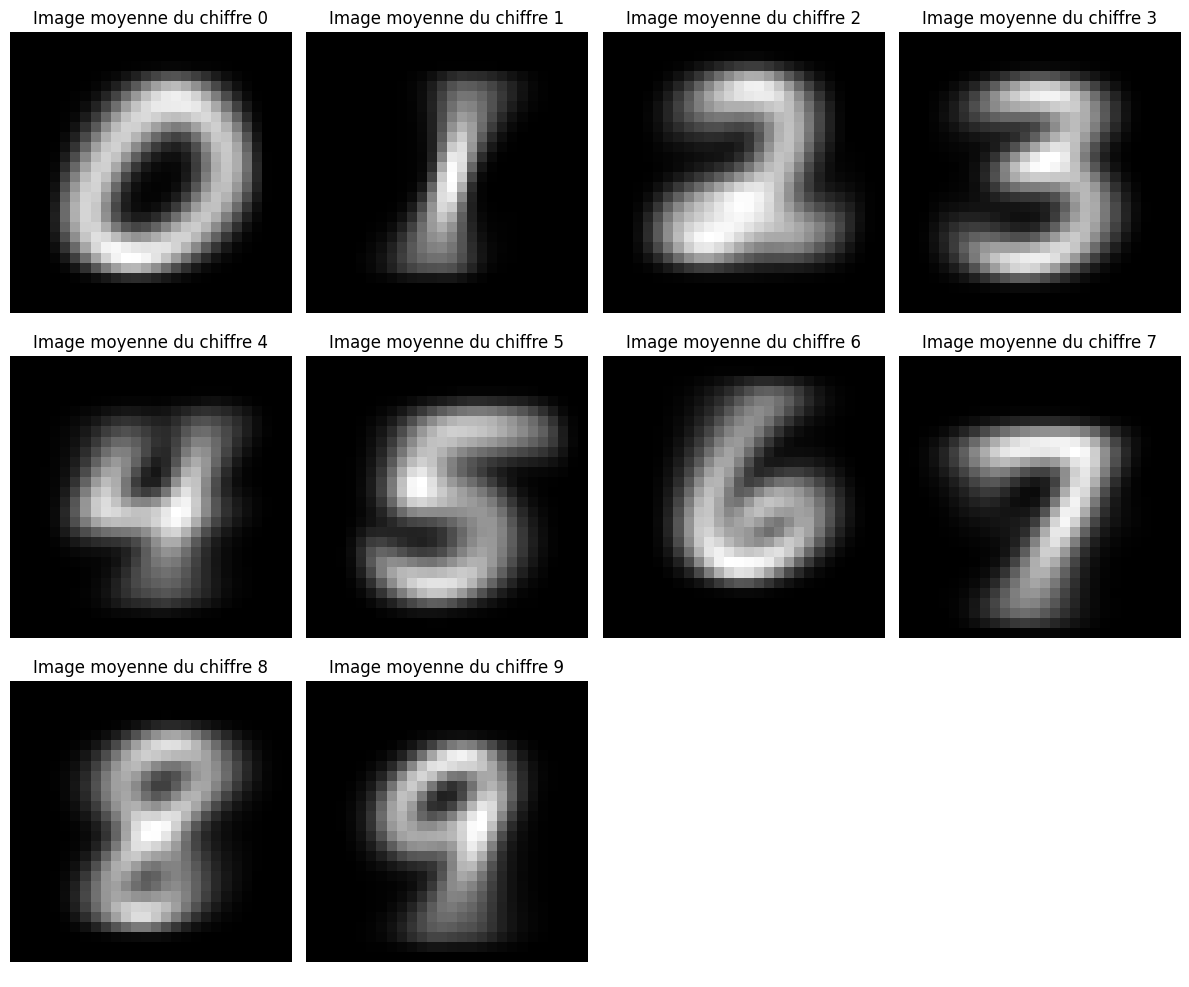

In [15]:
# Charger les données
df = pd.read_csv(r'C:\Users\fiche\Downloads\train.csv')
# Taille de l'image
image_size = (28, 28)
# Convertir les données en numpy array
data = df.iloc[:, 1:].to_numpy()
# Labels (chiffres de 0 à 9)
labels = list(range(10))  # Liste des chiffres de 0 à 9
# Calculer la moyenne des pixels pour chaque chiffre
average_images = {}
for label in labels:
    # Sélectionner les données pour le chiffre actuel
    digit_data = data[df['label'] == label]
    # Calculer la moyenne des pixels
    average_pixel_values = np.mean(digit_data, axis=0)
    # Remodeler les valeurs moyennes en une image
    average_image = average_pixel_values.reshape(image_size)
    # Stocker l'image moyenne dans un dictionnaire
    average_images[label] = average_image
# Afficher les images moyennes de chaque chiffre dans une grille 3x4
fig, axs = plt.subplots(3, 4, figsize=(12, 10))
for i, ax in enumerate(axs.flat):
    if i < len(labels):
        digit_label = labels[i]
        average_image = average_images[digit_label]
        ax.imshow(average_image, cmap='gray')
        ax.set_title(f'Image moyenne du chiffre {digit_label}')
        ax.axis('off')
    else:
        ax.axis('off')  # Masquer les sous-graphiques vides
plt.tight_layout()
plt.show()


In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Convolutional neural network (CNN)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Linear(7 * 7 * 64, 128)
        self.dropout = nn.Dropout(0.5)  # Dropout pour la régularisation
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.dropout(out)  # Dropout avant la couche de sortie
        out = self.fc2(out)
        return out

# Model
model = CNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # Eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
#cnn de chat gpt
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(all_labels))
disp.plot()
plt.show()

Epoch [1/2], Step [100/600], Loss: 0.2711
Epoch [1/2], Step [200/600], Loss: 0.0547
Epoch [1/2], Step [300/600], Loss: 0.1054
Epoch [1/2], Step [400/600], Loss: 0.1397
Epoch [1/2], Step [500/600], Loss: 0.0874
Epoch [1/2], Step [600/600], Loss: 0.1352


KeyboardInterrupt: 